<a href="https://colab.research.google.com/github/UmarAbdurrahman/Food-Delivery-Time-Prediction-Analysis/blob/main/Food_Delivery_Time_Prediction_Muhammad_Umar_Abdurrahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Project Background

In the digital age, food delivery services are increasingly popular due to the convenience and speed they offer. However, one of the main challenges is accurate **delivery time estimation**. Inaccurate predictions can reduce customer experience and affect user satisfaction.

By utilizing **Machine Learning**, we can build a model that can predict delivery times based on various factors, such as:

* Distance between the restaurant and the customer
* Traffic density
* Order time (peak/off-peak hours)
* Number of items in the order
* Courier characteristics

The main objective of this project is to **create an accurate food delivery time prediction model** so that it can:

1. Help food delivery companies improve customer satisfaction.
2. Provide realistic estimates for customers.
3. Help optimize the company's logistics flow.

---

# Data Crawling

## Import Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Load Dataset

In [2]:
# === 1. LOAD DATA ===
df = pd.read_csv("Food_Delivery_Times.csv")

print("Preview dataset:")
print(df.head())

Preview dataset:
   Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  \
0       522         7.93   Windy           Low   Afternoon      Scooter   
1       738        16.42   Clear        Medium     Evening         Bike   
2       741         9.52   Foggy           Low       Night      Scooter   
3       661         7.44   Rainy        Medium   Afternoon      Scooter   
4       412        19.03   Clear           Low     Morning         Bike   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0                    12                     1.0                 43  
1                    20                     2.0                 84  
2                    28                     1.0                 59  
3                     5                     1.0                 37  
4                    16                     5.0                 68  


In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


# Data Overview

Order_ID: Unique identifier for each order.

Distance_km: The delivery distance in kilometers.

Weather: Weather conditions during the delivery, including Clear, Rainy, Snowy, Foggy, and Windy.

Traffic_Level: Traffic conditions categorized as Low, Medium, or High.

Time_of_Day: The time when the delivery took place, categorized as Morning, Afternoon, Evening, or Night.

Vehicle_Type: Type of vehicle used for delivery, including Bike, Scooter, and Car.

Preparation_Time_min: The time required to prepare the order, measured in minutes.

Courier_Experience_yrs: Experience of the courier in years.

Delivery_Time_min: The total delivery time in minutes (target variable).

In [4]:
df.shape

(1000, 9)

In [5]:
df.dtypes

,0
Order_ID,int64
Distance_km,float64
Weather,object
Traffic_Level,object
Time_of_Day,object
Vehicle_Type,object
Preparation_Time_min,int64
Courier_Experience_yrs,float64
Delivery_Time_min,int64


In [6]:
print("\nInfo dataset:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB
None

Missing values:
Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_E

In [7]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


# Data Preperation

## Data Inspection

### Handling Missing Values

In [8]:
# === 3. HANDLE MISSING VALUE (versi aman tanpa warning) ===
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

In [9]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64


### Handling Duplicated

In [10]:
df.duplicated().sum()

np.int64(0)

## Encoding Categorical

In [11]:
# Drop Order_ID since it's just an identifier
df = df.drop(columns=["Order_ID"])

In [17]:
for col in df.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Exploratory Data Analytics

## Distribution Delivery Time

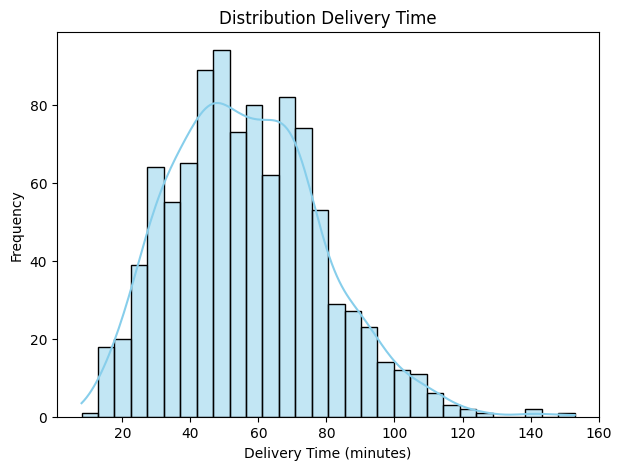

In [35]:
plt.figure(figsize=(7,5))
sns.histplot(df["Delivery_Time_min"], bins=30, kde=True, color="skyblue")
plt.title("Distribution Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()

---

📊 **Interpretation**

1. **Distribution Shape**

   * The graph shows a **right-skewed (positively skewed)** distribution.
   * This means that most orders are delivered within a normal time frame (around 40–70 minutes), but a small number of deliveries take much longer (up to >120 minutes).

2. **Highest Frequency (Mode)**

   * The peak of the histogram is around **45–55 minutes**.
   * This indicates that the majority of food deliveries are completed within that time range.

3. **Range**

   * The lowest delivery time is around **10–15 minutes**.
   * The highest delivery time can reach **150 minutes**.
   * These high values indicate the possibility of **outliers** (e.g., due to traffic, weather, or restaurants taking a long time to prepare orders).

4. **Spread**

   * Most of the data is concentrated below **100 minutes**.
   * After that, the frequency decreases dramatically.

5. **Implications for Business**

   * Companies can set a **standard delivery time estimate of around 45–60 minutes** as this is the most common range.
   * Outlier cases (>100 minutes) need to be investigated to determine the cause of the delay (whether due to long distances, peak hours, or other factors).

---

## Correlation Heatmap Numeric Features Only

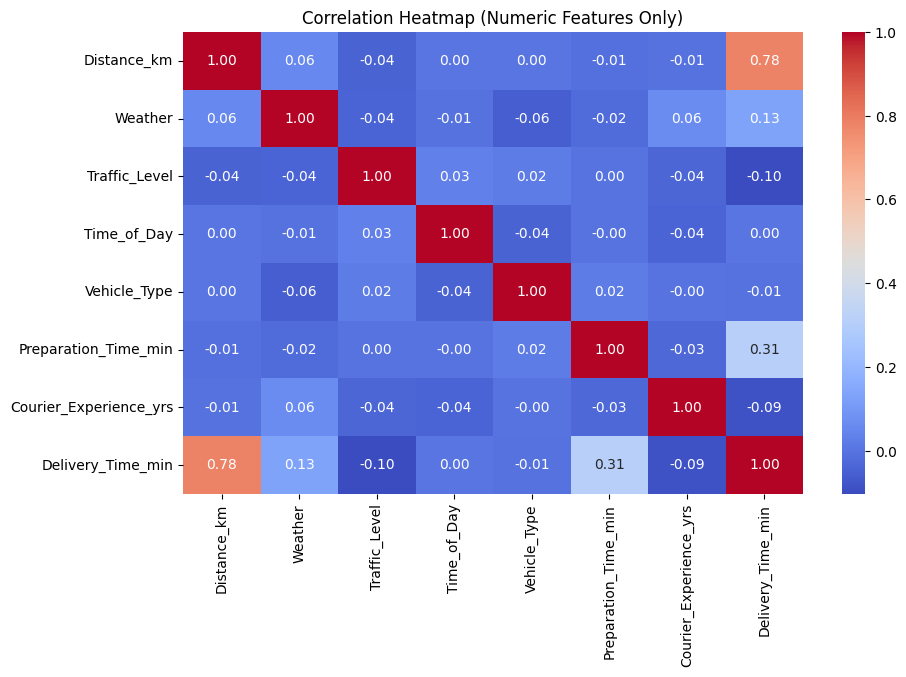

In [34]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

---

**📊 Key Observations**

1. **Distance vs Delivery Time (0.78)**

   * Strong positive correlation → as distance increases, delivery time also increases.
   * This confirms that **distance is the primary factor** influencing delivery time.

2. **Preparation Time vs Delivery Time (0.31)**

   * Moderate positive correlation → longer restaurant preparation adds to delivery delays, but the impact is smaller compared to distance.

3. **Courier Experience vs Delivery Time (-0.09)**

   * Weak negative correlation → more experienced couriers slightly reduce delivery time, but the effect is minimal.

4. **No Strong Multicollinearity**

   * Aside from distance and delivery time, correlations among other variables are weak.
   * This indicates that features are relatively independent, which is good for modeling.

---


## Scatter plot Distance vs Delivery Time

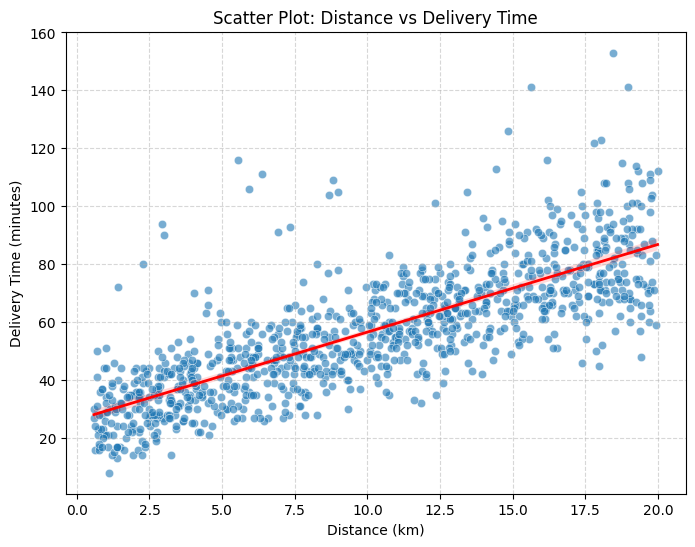

In [14]:
# Scatter plot Distance vs Delivery Time
plt.figure(figsize=(8,6))
sns.scatterplot(x="Distance_km", y="Delivery_Time_min", data=df, alpha=0.6)

# Tambahkan garis regresi sederhana
sns.regplot(x="Distance_km", y="Delivery_Time_min", data=df,
            scatter=False, color="red", line_kws={"linewidth":2})

plt.title("Scatter Plot: Distance vs Delivery Time")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (minutes)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

📊 Scatter Plot Interpretation

Positive Relationship → A red upward trend line is visible, indicating that the greater the distance (km), the longer the delivery time (minutes).

Strong Correlation → The data points follow a linear pattern despite variations. This indicates that distance is the main factor determining delivery time.

Data Variation → At the same distance, delivery times can vary (influenced by other factors such as traffic, weather, or courier speed).

Outliers → There are some deliveries that take much longer than the normal trend (>120 minutes), which may be due to operational issues.

Business Implications → The delivery time prediction model should make distance the primary variable, while taking other factors into account to reduce error.

## Boxplot Delivery Time Against Categorical Columns

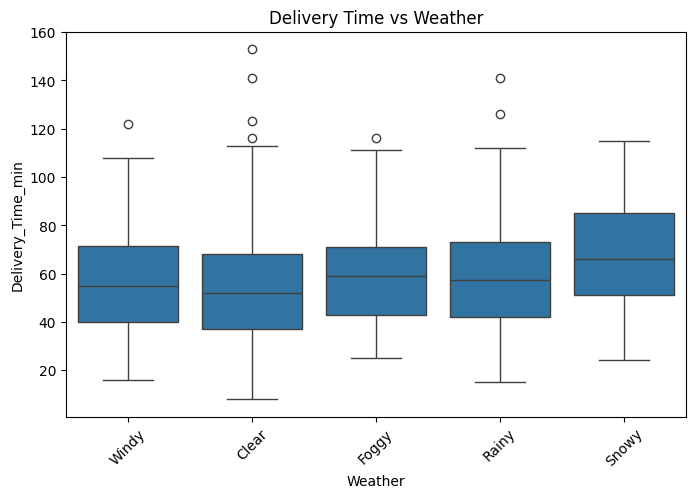

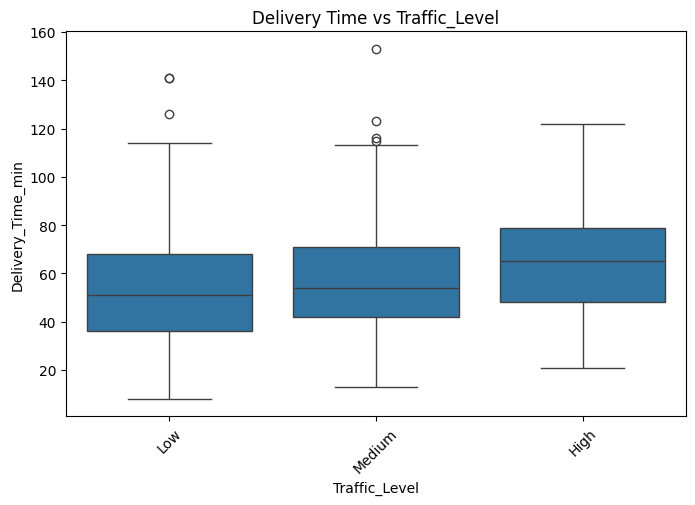

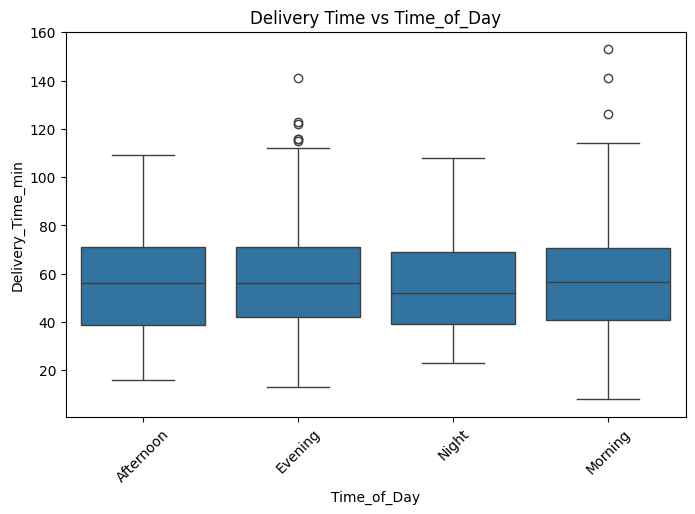

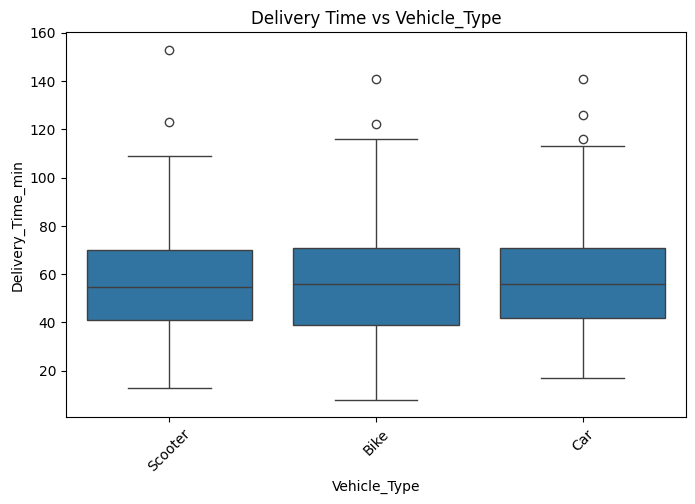

In [15]:
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col], y=df["Delivery_Time_min"])
    plt.title(f"Delivery Time vs {col}")
    plt.xticks(rotation=45)
    plt.show()

---
1️⃣ **Weather vs Delivery Time**

* **Snowy** → Longest delivery time, higher median than other weather conditions.
* **Clear** → Tends to be faster, lower median.
* **Rainy, Foggy, and Windy** conditions are in the middle, but still slightly longer than clear weather.
  ➡️ This means that **bad weather increases delivery time**.

---
2️⃣ **Traffic Level vs. Delivery Time**

* **Low traffic** → Fastest delivery time (low median).
* **Medium traffic** → Slightly longer than low traffic.
* **High traffic** → Longest, with significant increases in median and range.
  ➡️ **The heavier the traffic, the longer the delivery time**.

---
3️⃣ **Time of Day vs. Delivery Time**

* **Afternoon and Morning** → Relatively faster delivery times.
* **Evening and Night** → Longer, possibly due to heavy traffic or operational conditions.
  ➡️ **Evening and nighttime tend to slow down delivery**.

---
4️⃣ **Vehicle Type vs. Delivery Time**

* **Scooter** → Lowest median delivery time (faster).
* **Bike** → Almost the same as scooters, slightly longer.
* **Car** → Delivery times tend to be the longest (higher median).
  ➡️ Small vehicles such as scooters are **more efficient in urban areas** than cars.

---

📌 General Conclusion:

* **External factors (weather & traffic)** and **operational factors (vehicle & time)** greatly affect delivery time.
* **Bad weather, heavy traffic, evening/nighttime hours, and the use of cars** result in longer delivery times.
* Conversely, **clear weather, smooth traffic, the use of scooters, and morning/daytime deliveries** are more efficient.

---

## Distribution of Categorical Features (Weather, Traffic Level, Vehicle Type)

/tmp/ipython-input-1632559535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


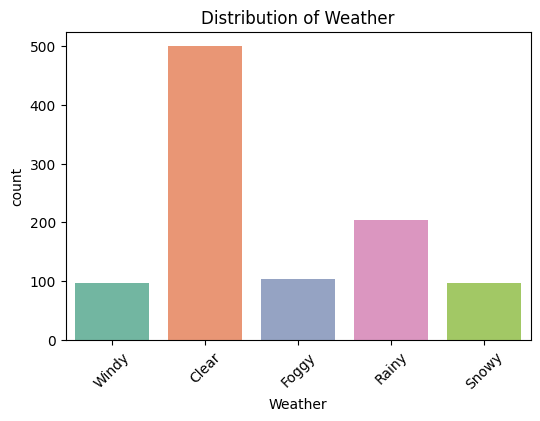

/tmp/ipython-input-1632559535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


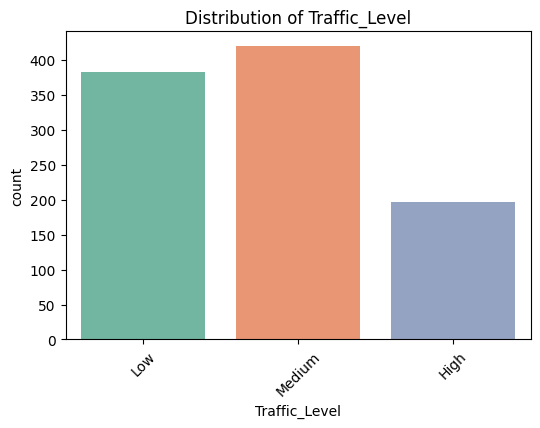

/tmp/ipython-input-1632559535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


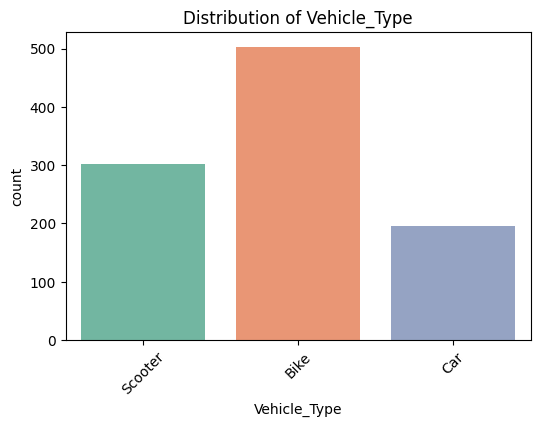

In [16]:
categorical_cols = ["Weather", "Traffic_Level", "Vehicle_Type"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

---

**🌤 Weather Distribution**

* **Clear weather dominates** the dataset (~500+ orders), meaning most deliveries occur under normal weather conditions.
* Other conditions like **Rainy, Windy, Foggy, and Snowy** are significantly less frequent.
* Business implication: The dataset may be **biased towards clear weather**, so model performance might be less accurate in rare weather conditions.

---

**🚦 Traffic Level Distribution**

* **Medium and Low traffic** are the most common (~380–420 each).
* **High traffic is less frequent (~200)**, suggesting fewer data points under congested conditions.
* Business implication: Predictions under **high traffic** might be less reliable due to limited data representation.

---

**🛵 Vehicle Type Distribution**

* **Bikes are the dominant vehicle (~500)**, followed by **Scooters (~300)** and **Cars (~200)**.
* This indicates delivery services are mostly **two-wheeler based**, likely chosen for speed and efficiency in urban areas.
* Business implication: Models may be **better optimized for bike/scooter deliveries** and less robust for cars, which have fewer examples.

---

# Machine Learning

## Linear Regression & Random Forest

### Model Preperation

In [18]:
# === 5. SPLIT DATA ===
X = df.drop("Delivery_Time_min", axis=1)   # asumsi target bernama Delivery_Time
y = df["Delivery_Time_min"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# === 6. SCALING ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear Regression

In [20]:
# === 7A. BASELINE MODEL: LINEAR REGRESSION ===
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\n=== Evaluasi Linear Regression ===")
print(f"MAE  : {mae_lr:.2f}")
print(f"RMSE : {rmse_lr:.2f}")
print(f"R2   : {r2_lr:.2f}")


=== Evaluasi Linear Regression ===
MAE  : 7.29
RMSE : 10.45
R2   : 0.76


### Random Forest

In [21]:
# === 7B. ADVANCED MODEL: RANDOM FOREST ===
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n=== Evaluasi Random Forest ===")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R2   : {r2_rf:.2f}")


=== Evaluasi Random Forest ===
MAE  : 6.82
RMSE : 9.78
R2   : 0.79


---

**📊 Model Comparison: Linear Regression vs Random Forest**

* **Linear Regression**

  * MAE: **7.29 minutes**
  * RMSE: **10.45 minutes**
  * R²: **0.76**

* **Random Forest**

  * MAE: **6.82 minutes** → better than Linear Regression (lower error).
  * RMSE: **9.78 minutes** → also lower, meaning fewer large errors.
  * R²: **0.79** → slightly higher, showing Random Forest explains more variance in delivery time.

---

**⚡ Key Insights**

* Both models perform reasonably well (R² ~0.76–0.79).
* **Random Forest outperforms Linear Regression** across all metrics, making it more reliable for predicting delivery times.
* The improvement is modest but meaningful, especially in reducing prediction errors (MAE and RMSE).
* Random Forest is better suited for handling **non-linear relationships** between features and delivery time.

In [43]:
# === 7C. HYPERPARAMETER TUNING: RANDOM FOREST ===
# Definisikan model Random Forest
rf = RandomForestRegressor(random_state=42)

# Definisikan grid hyperparameter untuk diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Lakukan Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                          cv=5, scoring='neg_mean_squared_error',
                          n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Tampilkan hyperparameter terbaik
print("\n=== Hyperparameter Terbaik ===")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best RMSE: {(-grid_search.best_score_)**0.5:.2f}")

# Gunakan model terbaik untuk prediksi
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

=== Hyperparameter Terbaik ===
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best RMSE: 12.02


In [44]:
# === 7D. EVALUASI MODEL TERBAIK ===
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n=== Evaluasi Random Forest dengan Hyperparameter Terbaik ===")
print(f"MAE  : {mae_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R2   : {r2_rf:.2f}")


=== Evaluasi Random Forest dengan Hyperparameter Terbaik ===
MAE  : 6.85
RMSE : 9.82
R2   : 0.78


### Feature Importance Random Forest

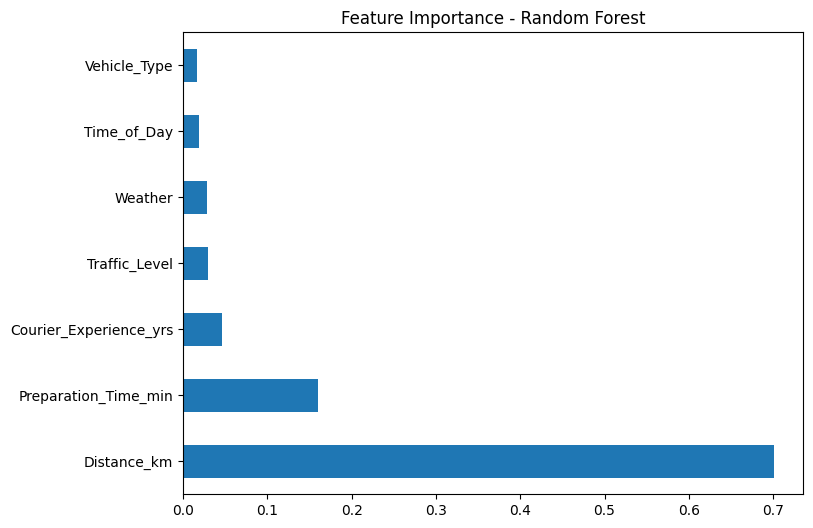

In [22]:
# === 8A. FEATURE IMPORTANCE (Random Forest) ===
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Random Forest")
plt.show()


---

**📊 Key Observations**

1. **Distance (km)**

   * By far the most important predictor (~70%).
   * Confirms that **delivery distance is the primary factor** influencing delivery time.

2. **Preparation Time (min)**

   * Second most important feature (~16–17%).
   * Restaurant preparation speed significantly affects delivery efficiency.

3. **Courier Experience**

   * Minor but noticeable impact (~5%).
   * More experienced couriers contribute to slightly faster deliveries.

4. **Weather, Traffic Level, Time of Day, Vehicle Type**

   * Very low importance (<5% each).
   * These factors have limited effect in the current dataset, possibly due to imbalance (e.g., most deliveries in clear weather, medium traffic, and by bike).

---

### Feature Importance - Random Forest (Tuned)

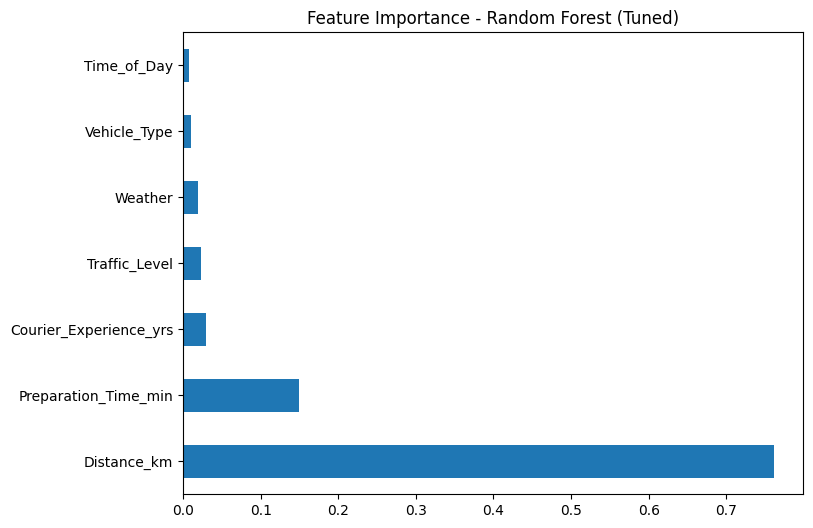

In [45]:
# === 8B. FEATURE IMPORTANCE (Random Forest) ===
importances = best_rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance - Random Forest (Tuned)")
plt.show()

---

**✅ Most Important Feature:**

* **Distance_km (~0.73)**

  * This is by far the most important feature for the model.
  * It means the **distance between the origin and the destination** has the strongest influence on the prediction (likely delivery time or duration).
  * Makes intuitive sense: longer distances take more time regardless of other variables.

**🟨 Moderately Important Feature:**

* **Preparation_Time_min (~0.17)**

  * This is the second most influential factor.
  * The time it takes to prepare the order significantly contributes to the delivery time.
  * Suggests that optimizing kitchen/restaurant efficiency can have a noticeable impact on overall delivery performance.

**🔽 Least Important Features (low impact, each < 0.05):**

* **Courier_Experience_yrs**
* **Traffic_Level**
* **Weather**
* **Vehicle_Type**
* **Time_of_Day**

These features have **minimal impact** on the model's decision-making. There could be several reasons for this:

* These variables might not vary much in the dataset.
* The data may not capture their effects well (e.g., inaccurate traffic or weather data).
* The model might already capture their influence indirectly through the more important features.

---

### Visualization of Prediction vs Actual

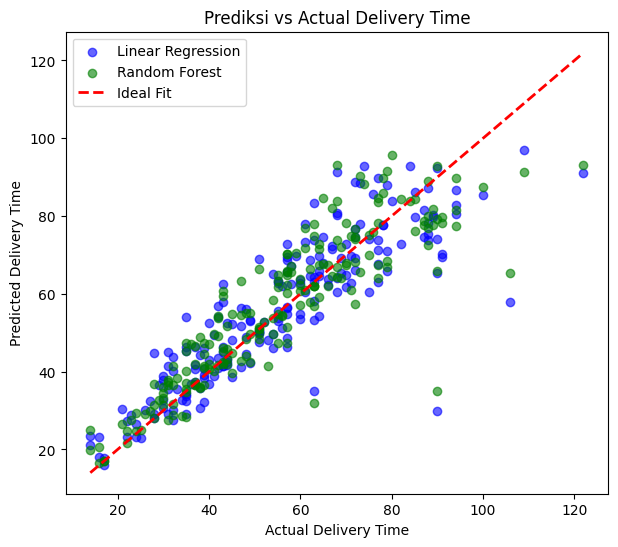

In [40]:
# === 9. VISUALISASI PREDIKSI vs ACTUAL ===
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="green", label="Random Forest")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Ideal Fit")
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Prediksi vs Actual Delivery Time")
plt.legend()
plt.show()

---

📊 **Interpretation of Predicted vs. Actual Delivery Time**

* The graph shows a comparison of **predicted delivery time** (y-axis) with **actual time** (x-axis).
* The **red line (Ideal Fit)** represents the perfect condition, where prediction = actual.
* The **blue (Linear Regression)** and **green (Random Forest)** points are scattered around the red line.

Key Insights:

1. **Linear Regression and Random Forest have similar performance**

   * The blue and green points overlap quite a bit.
   * Both follow the pattern of the red line, meaning the models are quite accurate.

2. **Predictions are quite stable in the 20–90 minute range**

   * The points are quite close to the red line.
   * This means that the models are able to predict well within the normal delivery time range.

3. **Errors are greater at the tail of the distribution (outliers)**

   * For longer deliveries (>100 minutes), the points begin to spread far from the red line.
   * This shows that the model is less accurate at predicting outliers or extreme cases (e.g., severe traffic jams, bad weather, very distant orders).

---

## Business Recommendations

---

**📌 Business Recommendations**

***High Priority:***

* **Optimize Long-Distance Orders**
  → Since distance is the main driver of delays (~73% impact), consider setting dynamic delivery fees, service zones, or incentives for couriers handling long-distance deliveries.

* **Improve Restaurant Preparation Efficiency**
  → Preparation time has ~17% influence; training staff, streamlining kitchen processes, and monitoring slow-performing restaurants can significantly cut delays.

* **Set Realistic Delivery Estimates**
  → Use predictive model output (45–60 minutes as standard range) to provide accurate delivery time estimates, reducing customer complaints.

***Mid Priority***

* **Leverage Courier Experience**
  → Even though courier experience has smaller impact (~5%), assigning more experienced couriers during peak hours or long-distance deliveries can reduce outliers in delivery time.

* **Investigate and Manage Outliers**
  → Deliveries >100 minutes often result from traffic, weather, or operational inefficiencies. Implement monitoring and alert systems to quickly address abnormal delays.

* **Customer Communication**
  → Proactively notify customers about potential delays (traffic, weather, distance) to maintain trust and satisfaction.

***Low Priority***

* **Data-Driven Logistics Planning**
  → Use the prediction model to simulate scenarios (e.g., new delivery zones, vehicle types) before rollout, ensuring better operational decisions.

---